In [40]:
import pandas as pd
import os

DATA_DIR = "data/imdb/csv_out"

# --- Chargement filtré sur les films ---
basics_path = os.path.join(DATA_DIR, "title.basics.csv")
ratings_path = os.path.join(DATA_DIR, "title.ratings.csv")

# On ne lit que les colonnes utiles pour réduire la RAM
movies = pd.read_csv(
    basics_path,
    usecols=["tconst", "primaryTitle", "startYear", "genres", "titleType"],
    dtype={"tconst": "string", "primaryTitle": "string", "genres": "string", "titleType": "string"},
    low_memory=False
)

# Filtre : uniquement films
movies = movies[movies["titleType"] == "movie"].drop(columns="titleType")

# --- Chargement des ratings ---
ratings = pd.read_csv(
    ratings_path,
    dtype={"tconst": "string"},
    low_memory=False
)

# --- Fusion ---
movies_with_ratings = movies.merge(ratings, on="tconst", how="inner")

# --- Filtre : rating et numVotes non nuls ---
movies_with_ratings = movies_with_ratings.dropna(subset=["averageRating", "numVotes"])
movies_with_ratings = movies_with_ratings[movies_with_ratings["numVotes"] > 0]

# --- Résultat ---
print(f"Lignes finales : {len(movies_with_ratings):,}")
print(movies_with_ratings.head(10))

# Sauvegarde si besoin
out_path = os.path.join(DATA_DIR, "movies_with_ratings.csv")
movies_with_ratings.to_csv(out_path, index=False, encoding="utf-8")
print(f"✅ Sauvegardé : {out_path}")


Lignes finales : 333,901
      tconst                    primaryTitle  startYear                      genres  averageRating  numVotes
0  tt0000009                      Miss Jerry     1894.0                     Romance            5.3       228
1  tt0000147   The Corbett-Fitzsimmons Fight     1897.0      Documentary,News,Sport            5.2       564
2  tt0000502                        Bohemios     1905.0                        <NA>            3.6        22
3  tt0000574     The Story of the Kelly Gang     1906.0  Action,Adventure,Biography            6.0      1012
4  tt0000591                The Prodigal Son     1907.0                       Drama            5.3        34
5  tt0000615              Robbery Under Arms     1907.0                       Drama            4.0        30
6  tt0000630                          Hamlet     1908.0                       Drama            3.0        34
7  tt0000675                     Don Quijote     1908.0                       Drama            3.9     

In [41]:
# --- TOP 10 par nombre de votes ---
top_numvotes = movies_with_ratings.sort_values("numVotes", ascending=False).head(10)
print("\n🎬 Top 10 — Plus de votes")
display(top_numvotes[["primaryTitle", "startYear", "genres", "averageRating", "numVotes"]])

# --- TOP 10 par meilleure note (au moins 1000 votes pour éviter les cas absurdes) ---
top_best = (
    movies_with_ratings[movies_with_ratings["numVotes"] >= 1000]
    .sort_values(["averageRating", "numVotes"], ascending=[False, False])
    .head(10)
)
print("\n🏆 Top 10 — Mieux notés (>= 1000 votes)")
display(top_best[["primaryTitle", "startYear", "genres", "averageRating", "numVotes"]])

# --- TOP 10 des plus récents ---
top_recent = movies_with_ratings.sort_values("startYear", ascending=False).head(10)
print("\n🆕 Top 10 — Plus récents")
display(top_recent[["primaryTitle", "startYear", "genres", "averageRating", "numVotes"]])

# --- TOP 10 pires notes (>= 1000 votes pour filtrer les outliers) ---
top_worst = (
    movies_with_ratings[movies_with_ratings["numVotes"] >= 1000]
    .sort_values("averageRating", ascending=True)
    .head(10)
)
print("\n💩 Top 10 — Pires notés (>= 1000 votes)")
display(top_worst[["primaryTitle", "startYear", "genres", "averageRating", "numVotes"]])



🎬 Top 10 — Plus de votes


,primaryTitle,startYear,genres,averageRating,numVotes
62718,The Shawshank Redemption,1994.0,Drama,9.3,3082234
140717,The Dark Knight,2008.0,"Action,Crime,Drama",9.1,3057231
183724,Inception,2010.0,"Action,Adventure,Sci-Fi",8.8,2715885
72808,Fight Club,1999.0,"Crime,Drama,Thriller",8.8,2500020
61972,Forrest Gump,1994.0,"Drama,Romance",8.8,2407366
146653,Interstellar,2014.0,"Adventure,Drama,Sci-Fi",8.7,2386466
62568,Pulp Fiction,1994.0,"Crime,Drama",8.8,2359396
71497,The Matrix,1999.0,"Action,Sci-Fi",8.7,2177179
37664,The Godfather,1972.0,"Crime,Drama",9.2,2149557
67417,The Lord of the Rings: The Fellowship of the Ring,2001.0,"Adventure,Drama,Fantasy",8.9,2131055



🏆 Top 10 — Mieux notés (>= 1000 votes)


,primaryTitle,startYear,genres,averageRating,numVotes
278264,Raju Gaani Savaal,2025.0,"Action,Drama",10.0,1050
262454,Thayyal Machine,2024.0,Horror,9.7,1008
275872,Kousalya Tanaya Ragava,2025.0,<NA>,9.6,1201
262864,Golden Opulence: 500 Years of Luxury in Anatolia,2024.0,Documentary,9.5,1631
266592,My Hero,2024.0,<NA>,9.5,1232
267878,Meesha,2025.0,<NA>,9.4,1006
62718,The Shawshank Redemption,1994.0,Drama,9.3,3082234
270564,Mahavatar Narsimha,2024.0,"Action,Animation,Drama",9.3,26966
225405,I Was A Stranger,2024.0,Drama,9.3,8379
276454,Guru Nanak Jahaz,2025.0,History,9.3,3701



🆕 Top 10 — Plus récents


,primaryTitle,startYear,genres,averageRating,numVotes
274337,Madha Gaja Raja,2025.0,"Action,Comedy",5.5,1402
275157,Fair Rain,2025.0,Drama,3.1,186
275143,Dehset Ekrani: Habis Ruh,2025.0,Horror,7.4,6
176650,Viridian,2025.0,Thriller,4.2,92
333803,Cash Collectors,2025.0,Comedy,5.4,16
275162,Duns,2025.0,"Action,Drama",4.3,155
228970,ALEXANDRA,2025.0,Drama,6.9,21
259884,Ei Raat Tomar Amar,2025.0,Drama,7.2,122
273190,Shiranai Kanojo,2025.0,"Fantasy,Romance",7.7,67
273175,Love Me Tender,2025.0,Drama,6.8,40



💩 Top 10 — Pires notés (>= 1000 votes)


,primaryTitle,startYear,genres,averageRating,numVotes
183940,2025 - The World enslaved by a Virus,2021.0,"Adventure,Sci-Fi",1.0,2809
303171,Reis,2017.0,"Biography,Drama",1.0,74415
180953,321 Action,2020.0,Drama,1.0,10256
314865,Cumali Ceber,2017.0,Comedy,1.0,39680
260703,Elment az öszöd,2013.0,Drama,1.1,1343
330078,The Crimean Bridge. Made with Love!,2018.0,Romance,1.1,1260
189651,Nyay: The Justice,2021.0,Drama,1.1,1682
120358,A Cosmic Adventure on Earth,2002.0,Comedy,1.1,1185
261035,We Love Bad Boys,2024.0,Comedy,1.2,3027
303711,Smolensk,2016.0,"Drama,Thriller",1.2,40372


C:\Users\PR065731\AppData\Local\Temp\ipykernel_25524\4263915385.py:48: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PR065731\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


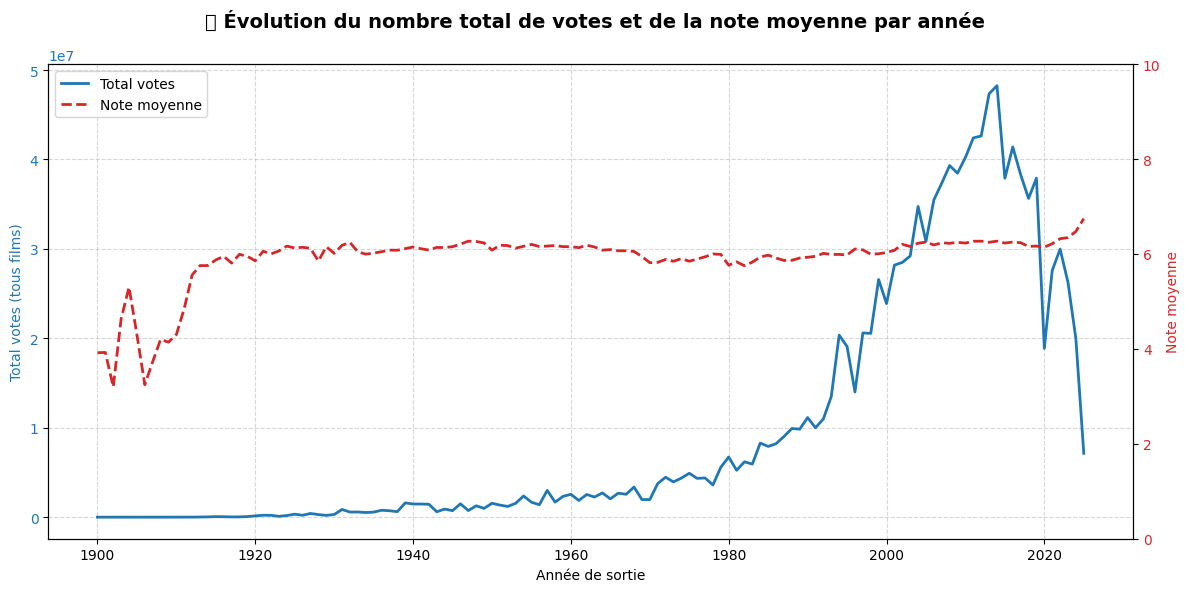

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrage : on ne garde que les années valides
df_year = movies_with_ratings.copy()
df_year = df_year[pd.to_numeric(df_year["startYear"], errors="coerce").notna()]
df_year["startYear"] = df_year["startYear"].astype(int)

# Agrégations par année
yearly_stats = (
    df_year.groupby("startYear")
    .agg(total_votes=("numVotes", "sum"),
         avg_rating=("averageRating", "mean"))
    .reset_index()
    .sort_values("startYear")
)

# Suppression des années extrêmes peu parlantes (ex: < 1900 ou > 2025)
yearly_stats = yearly_stats[(yearly_stats["startYear"] >= 1900) & (yearly_stats["startYear"] <= 2025)]

# --- Graphique ---
fig, ax1 = plt.subplots(figsize=(12,6))

# Axe gauche : total votes
color_votes = "tab:blue"
ax1.set_xlabel("Année de sortie")
ax1.set_ylabel("Total votes (tous films)", color=color_votes)
ax1.plot(yearly_stats["startYear"], yearly_stats["total_votes"], color=color_votes, linewidth=2, label="Total votes")
ax1.tick_params(axis="y", labelcolor=color_votes)

# Axe droit : note moyenne
ax2 = ax1.twinx()
color_rating = "tab:red"
ax2.set_ylabel("Note moyenne", color=color_rating)
ax2.plot(yearly_stats["startYear"], yearly_stats["avg_rating"], color=color_rating, linewidth=2, linestyle="--", label="Note moyenne")
ax2.tick_params(axis="y", labelcolor=color_rating)
ax2.set_ylim(0, 10)  # barème IMDb

# Titres et style
fig.suptitle("🎬 Évolution du nombre total de votes et de la note moyenne par année", fontsize=14, fontweight="bold")
ax1.grid(True, which="both", linestyle="--", alpha=0.5)

# Légendes combinées
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

plt.tight_layout()
plt.show()


Max numVotes : 3,082,234


C:\Users\PR065731\AppData\Local\Temp\ipykernel_25524\2628691744.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_votes.groupby("vote_bin")
C:\Users\PR065731\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


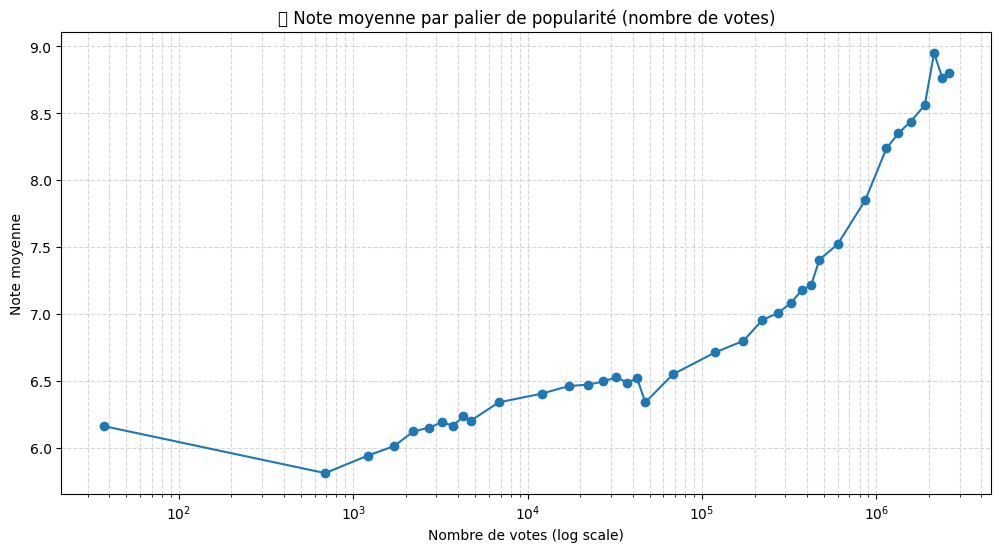


Aperçu des paliers :
          vote_bin  avg_rating  film_count  mid_votes
0         [0, 500)    6.162383      267146       37.0
1      [500, 1000)    5.810307       20432      690.0
2     [1000, 1500)    5.941102        9345     1211.0
3     [1500, 2000)    6.012943        5694     1719.5
4     [2000, 2500)    6.122719        3913     2215.0
5     [2500, 3000)    6.150612        2776     2735.0
6     [3000, 3500)    6.192616        2194     3242.5
7     [3500, 4000)    6.162089        1762     3743.0
8     [4000, 4500)    6.234081        1382     4247.5
9     [4500, 5000)    6.202625        1181     4724.0
10   [5000, 10000)    6.339484        6129     6835.0
11  [10000, 15000)    6.404749        2527    12081.0
12  [15000, 20000)    6.460816        1470    17165.0
13  [20000, 25000)    6.472023        1033    22327.0
14  [25000, 30000)    6.495448         725    27157.0


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_votes = movies_with_ratings.copy()

# On enlève les NaN et on force int
df_votes = df_votes[df_votes["numVotes"].notna()]
df_votes["numVotes"] = df_votes["numVotes"].astype(int)

max_votes = df_votes["numVotes"].max()
print(f"Max numVotes : {max_votes:,}")

# --- Définition des paliers progressifs ---
# Plus petits au début, plus larges après
bins = np.unique(
    np.concatenate([
        np.arange(0, 5000, 500),           # paliers de 500 votes
        np.arange(5000, 50000, 5000),      # paliers de 5k votes
        np.arange(50000, 500000, 50000),   # paliers de 50k votes
        np.arange(500000, max_votes+1, 250000)  # gros paliers finaux
    ])
)

# Catégorisation
df_votes["vote_bin"] = pd.cut(df_votes["numVotes"], bins=bins, right=False)

# Agrégation : moyenne de la note + nombre de films
palier_stats = (
    df_votes.groupby("vote_bin")
    .agg(avg_rating=("averageRating", "mean"),
         film_count=("tconst", "count"),
         mid_votes=("numVotes", "median"))
    .reset_index()
)

# On enlève les paliers vides
palier_stats = palier_stats.dropna(subset=["avg_rating"])

# --- Graphique ---
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(palier_stats["mid_votes"], palier_stats["avg_rating"], marker="o", linestyle="-", color="tab:blue")
ax.set_xscale("log")  # car l'échelle des votes est très étendue
ax.set_xlabel("Nombre de votes (log scale)")
ax.set_ylabel("Note moyenne")
ax.set_title("🎯 Note moyenne par palier de popularité (nombre de votes)")
ax.grid(True, which="both", linestyle="--", alpha=0.5)

plt.show()

# --- Aperçu table ---
print("\nAperçu des paliers :")
print(palier_stats.head(15))


     startYear  avg_rating_top10  films_count
0         1900          3.920000            5
1         1901          3.925000            4
2         1902          3.200000            1
3         1903          4.633333            3
4         1904          5.300000            1
..         ...               ...          ...
121       2021          7.300000           10
122       2022          7.440000           10
123       2023          7.630000           10
124       2024          7.280000           10
125       2025          6.390000           10

[126 rows x 3 columns]


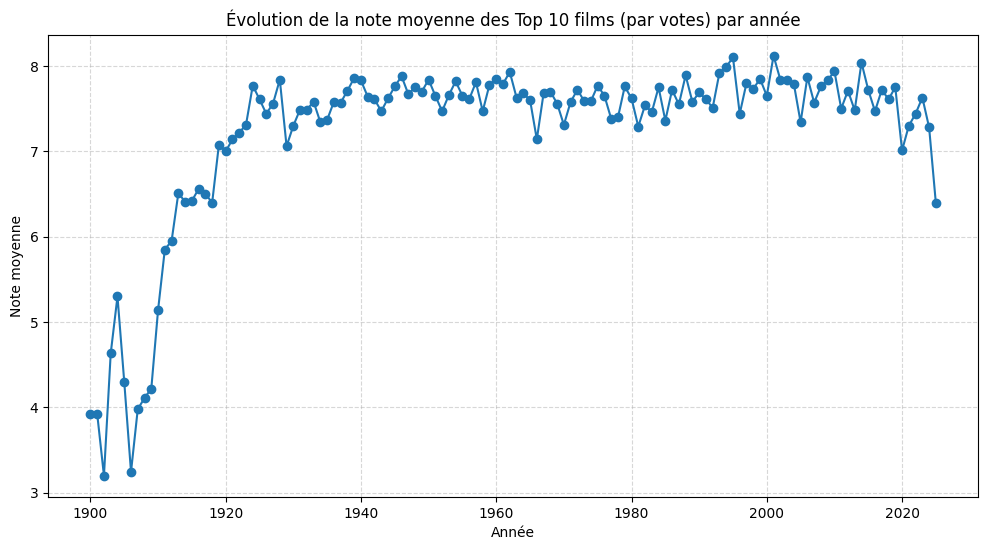

In [44]:
import pandas as pd

# Copie + filtrage années valides
df_year_top = movies_with_ratings.copy()
df_year_top = df_year_top[pd.to_numeric(df_year_top["startYear"], errors="coerce").notna()]
df_year_top["startYear"] = df_year_top["startYear"].astype(int)

# Supprimer années aberrantes
df_year_top = df_year_top[(df_year_top["startYear"] >= 1900) & (df_year_top["startYear"] <= 2025)]

# Groupe par année et calcul du top 10
result_list = []
for year, group in df_year_top.groupby("startYear"):
    top10 = group.sort_values("numVotes", ascending=False).head(10)
    avg_rating = top10["averageRating"].mean()
    result_list.append({"startYear": year, "avg_rating_top10": avg_rating, "films_count": len(top10)})

# DataFrame final
avg_rating_per_year = pd.DataFrame(result_list).sort_values("startYear").reset_index(drop=True)

# Affichage
print(avg_rating_per_year)

# Si besoin graphique
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(avg_rating_per_year["startYear"], avg_rating_per_year["avg_rating_top10"], marker="o")
plt.title("Évolution de la note moyenne des Top 10 films (par votes) par année")
plt.xlabel("Année")
plt.ylabel("Note moyenne")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()



🎭 Rating moyen par genre :
          genre  avg_rating  films_count
18         News    7.211859          683
7   Documentary    7.206841        53807
4     Biography    6.931588        10447
12    Game-Show    6.800000            6
13      History    6.781055         9348
15        Music    6.752640         8427
22        Sport    6.617883         4194
19   Reality-TV    6.525532           94
11    Film-Noir    6.446425          881
25          War    6.363836         6678
23    Talk-Show    6.342857           28
3     Animation    6.328955         5961
8         Drama    6.209069       151763
16      Musical    6.172927         6996
9        Family    6.160483        12711
20      Romance    6.083107        36365
6         Crime    5.969960        28928
5        Comedy    5.883175        80320
26      Western    5.867714         5154
2     Adventure    5.854398        20135
10      Fantasy    5.824153        10098
17      Mystery    5.813619        13180
0        Action    5.730509  

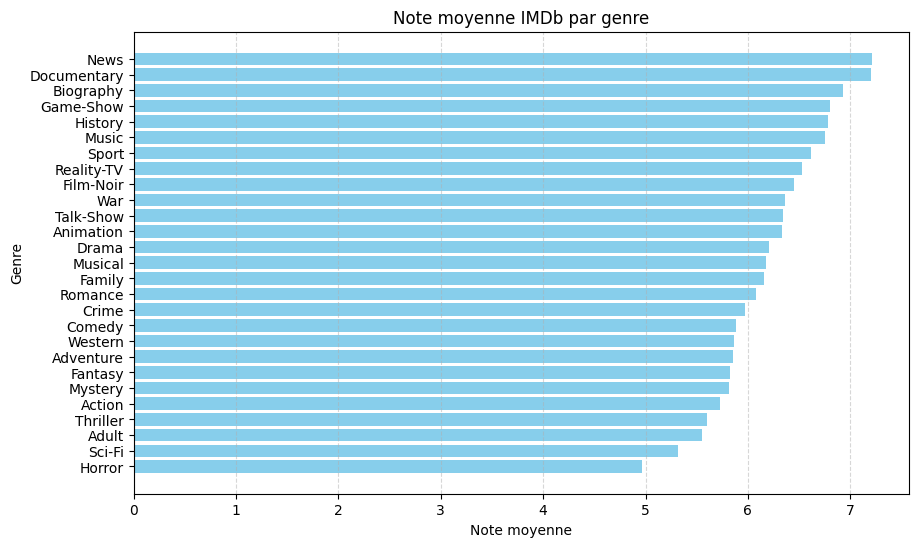

In [9]:
import pandas as pd

# Copie et filtrage
df_genre = movies_with_ratings.copy()
df_genre = df_genre[df_genre["genres"].notna()]

# Exploser les genres (un film avec "Drama,Romance" devient 2 lignes)
df_genre = df_genre.assign(genre=df_genre["genres"].str.split(",")).explode("genre")

# Calcul du rating moyen par genre
genre_stats = (
    df_genre.groupby("genre")
    .agg(avg_rating=("averageRating", "mean"),
         films_count=("tconst", "count"))
    .reset_index()
    .sort_values("avg_rating", ascending=False)
)

# Affichage
print("\n🎭 Rating moyen par genre :")
print(genre_stats)

# Graphique
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(genre_stats["genre"], genre_stats["avg_rating"], color="skyblue")
plt.xlabel("Note moyenne")
plt.ylabel("Genre")
plt.title("Note moyenne IMDb par genre")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()
